In [1]:
import pandas as pd
import math

import sklearn.linear_model
import sklearn.model_selection
import numpy as np
from sklearn import preprocessing
import xlrd
import h5py

import copy
import numpy.linalg
import sklearn.linear_model
import sklearn.model_selection
import matplotlib.pyplot as mt
import numpy as np
from sklearn import preprocessing, svm
import sklearn.svm
from sklearn.metrics import f1_score,classification_report
import pandas as pd
import math
# from sklearn import cross_validation
import random
import xlrd

from mlxtend.plotting import plot_decision_regions

In [2]:
data1 = h5py.File('/mnt/Education/Sem1/ML/Assignments/Assignment_2/hw-2_20119/data_1.h5', 'r+')
data2 = h5py.File('/mnt/Education/Sem1/ML/Assignments/Assignment_2/hw-2_20119/data_2.h5', 'r+')
data3 = h5py.File('/mnt/Education/Sem1/ML/Assignments/Assignment_2/hw-2_20119/data_3.h5', 'r+')
data4 = h5py.File('/mnt/Education/Sem1/ML/Assignments/Assignment_2/hw-2_20119/data_4.h5', 'r+')

# Kernels

In [3]:
def polynomialKernel(x, y):
    c = 1
    d = 2

    t = np.transpose(y)
    prod = np.dot(x, t)
    # c = np.ones([prod.shape[0], prod.shape[1]], dtype=int)
    sum = c + prod
    p = (sum) ** d

    return p


def polynomialKernel_2(x, y):
    c = 1
    d = 3

    t = np.transpose(y)
    prod = np.dot(x, t)
    # c = np.ones([prod.shape[0], prod.shape[1]], dtype=int)
    sum = c + prod
    p = (sum) ** d

    return p


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


# ------------------------------------------------------------------------------------------------------

# Data1

In [5]:
# print(list(data1.keys()))
data1_X = data1['x']
data1_Y = data1['y']

data1X_Values = np.array(data1_X.value)
data1Y_Values = np.array(data1_Y.value)
# print(data1X_Values.shape)
# print(data1Y_Values.shape)

In [6]:
model1 = svm.SVC(kernel=polynomialKernel)

model1.fit(data1X_Values, data1Y_Values)

# print(model1)

out1 = model1.predict(data1X_Values)

print('intercept:', model1.intercept_)
# for i in range(0, 100):
#     print(data1Y_Values[i], '-->', out1[i])
print('f1 score for model1:', f1_score(data1Y_Values, out1))


intercept: [1.85820294]
f1 score for model1: 1.0


-------------------------------------------


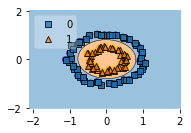

In [7]:
X = np.array(data1X_Values)
Y = np.array(data1Y_Values)

X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)
#
# Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
#
# mt.subplot(221)
# mt.contourf(xx, yy, Z, cmap=mt.cm.coolwarm, alpha=0.8)

mt.subplot(221)
mt.scatter(X0, X1, c=Y)

plot_decision_regions(X, Y, model1, legend=2)
print('-------------------------------------------')

# Data2

In [8]:
print(list(data2.keys()))
data2_X = data2['x']
data2_Y = data2['y']

data2X_Values = np.array(data2_X.value)
data2Y_Values = np.array(data2_Y.value)

# print(data2X_Values.shape)
# print(data2Y_Values.shape)


['x', 'y']


In [9]:
model2 = svm.SVC(kernel=polynomialKernel_2)

model2.fit(data2X_Values, data2Y_Values)

# print(model2)

out2 = model2.predict(data2X_Values)

print('intercept 2:', model2.intercept_)
# for i in range(0, 100):
#     print(data2Y_Values[i], '-->', out2[i])
print('f1 for model2:', f1_score(data2Y_Values, out2))


intercept 2: [1.63867448]
f1 for model2: 1.0


-------------------------------------------


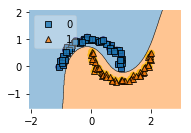

In [10]:
X = np.array(data2X_Values)
Y = np.array(data2Y_Values)

X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)
#
# Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
#
# mt.subplot(222)
# mt.contourf(xx, yy, Z, cmap=mt.cm.coolwarm, alpha=0.8)
mt.subplot(222)
mt.scatter(X0, X1, c=Y)
plot_decision_regions(X, Y, model2, legend=2)


print('-------------------------------------------')

# Data3

In [11]:
# print(list(data3.keys()))
data3_X = data3['x']
data3_Y = data3['y']

data3X_Values = np.array(data3_X.value)
data3Y_Values = np.array(data3_Y.value)

# print(data3X_Values.shape)
# print(data3Y_Values.shape)

In [12]:
model3 = svm.LinearSVC(multi_class='ovr')

model3.fit(data3X_Values, data3Y_Values)

# print(model3)

out3 = model3.predict(data3X_Values)

print('intercept 3:', model3.intercept_)
# for i in range(0, 100):
#     print(data3Y_Values[i], '-->', out3[i])
print('f1 for model3:\n', sklearn.metrics.classification_report(data3Y_Values, out3))

intercept 3: [-0.15383757 -2.30391576 -0.03045279]
f1 for model3:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/home/subhani007/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------


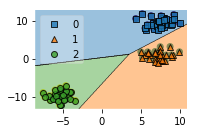

In [13]:
X = np.array(data3X_Values)
Y = np.array(data3Y_Values)

X0, X1 = X[:, 0], X[:, 1]
# xx, yy = make_meshgrid(X0, X1)
#
# Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
#
# mt.subplot(222)
# mt.contourf(xx, yy, Z, cmap=mt.cm.coolwarm, alpha=0.8)
mt.subplot(223)
mt.scatter(X0, X1, c=Y)
plot_decision_regions(X, Y, model3, legend=2)

print('-------------------------------------------')

# Data4

In [4]:
# print(list(data4.keys()))
data4_X = data4['x']
data4_Y = data4['y']

data4X_Values = np.array(data4_X.value)
data4Y_Values = np.array(data4_Y.value)

print(data4X_Values.shape)
print(data4Y_Values.shape)



(2000, 2)
(2000,)


In [5]:
model4 = svm.SVC(kernel=polynomialKernel)

model4.fit(data4X_Values, data4Y_Values)

# print(model4)

out4 = model4.predict(data4X_Values)

print('intercept 4:', model4.intercept_)
# for i in range(0, len(data4X_Values)):
#     print(data4Y_Values[i], '-->', out4[i])
print('f1 for model4:', f1_score(data4Y_Values, out4))

intercept 4: [2.92246017]
f1 for model4: 0.8851317752362009


In [6]:
X = np.array(data4X_Values)
Y = np.array(data4Y_Values)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [ ]:
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
# mt.subplot(222)
mt.contourf(xx, yy, Z, cmap=mt.cm.coolwarm, alpha=0.8)
mt.scatter(X0, X1, c=Y,s=1)

In [ ]:
# plot_decision_regions(X, Y, model4, legend=2)

# print('-------------------------------------------')

In [28]:
mt.show()